In [1]:
library(Rtsne)

Warning message:
"package 'Rtsne' was built under R version 3.6.1"

In [2]:
set.seed(1)

In [5]:
data <- read.csv(file="tempsensor_data_sim_sensors.csv", header=TRUE, sep=",")

In [8]:
head(data)

X,Temp_1_1,Temp_1_2,Temp_1_3,Temp_1_4,Temp_2_1,Temp_2_2,Temp_2_3,Temp_2_4,Temp_12_avg_open,...,Temp_3_1,Temp_3_2,Temp_3_3,Temp_3_4,Temp_4_1,Temp_4_2,Temp_4_3,Temp_4_4,Temp_34_avg_open,Temp_34_avg_close
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
07/23/2019 10:33,26.063,27.000,26.063,27.000,26.937,27.062,26.437,26.750,26.5000,...,25.187,26.125,25.062,26.000,25.062,26.688,25.062,26.063,25.1245,26.0315
07/23/2019 10:37,26.875,27.062,26.688,27.062,27.062,27.187,26.875,27.187,26.9685,...,25.750,26.312,25.750,26.312,25.562,26.625,25.562,26.625,25.6560,26.4685
07/23/2019 10:41,27.062,27.062,26.125,26.812,27.250,27.250,26.875,27.000,27.1560,...,25.687,25.937,25.062,25.937,26.437,26.437,24.750,25.438,26.0620,25.6875
07/23/2019 10:45,27.000,27.125,26.812,26.812,26.500,27.313,26.500,27.062,26.7500,...,25.687,25.937,25.062,25.937,26.437,26.437,24.750,25.438,26.0620,25.6875
07/23/2019 10:46,27.000,27.125,26.812,26.812,26.500,27.313,26.500,27.062,26.7500,...,26.250,26.250,25.250,25.250,26.562,26.688,24.875,24.875,26.4060,25.0625
07/23/2019 10:49,26.625,26.937,26.063,26.937,26.250,27.125,26.250,26.688,26.4375,...,26.250,26.250,25.250,25.250,26.562,26.688,24.875,24.875,26.4060,25.0625


In [4]:
# data=data[,2:5]

In [13]:
data=data[,2:21]
data_t=t(data)

In [14]:
head(data_t)

Temp_1_1,26.063,26.875,27.062,27.000,27.000,26.625,26.625,26.875,26.250,26.500,...,25.750,26.125,26.125,25.812,25.812,26.125,26.125,25.937,25.937,26.125
Temp_1_2,27.000,27.062,27.062,27.125,27.125,26.937,26.937,26.875,26.812,27.000,...,26.375,26.125,26.125,26.187,26.187,26.125,26.125,26.312,26.312,26.125
Temp_1_3,26.063,26.688,26.125,26.812,26.812,26.063,26.063,26.562,26.250,26.500,...,25.687,25.937,25.937,25.687,25.687,25.937,25.937,25.937,25.937,25.687
Temp_1_4,27.000,27.062,26.812,26.812,26.812,26.937,26.937,26.625,26.562,27.000,...,26.187,25.937,25.937,26.187,26.187,25.937,25.937,26.187,26.187,25.875
Temp_2_1,26.937,27.062,27.250,26.500,26.500,26.250,26.250,27.250,27.187,27.000,...,26.437,25.750,25.750,25.438,25.438,25.875,25.875,25.562,25.562,26.000
Temp_2_2,27.062,27.187,27.250,27.313,27.313,27.125,27.125,27.250,27.375,27.313,...,26.437,25.750,25.750,26.125,26.125,25.875,25.875,26.063,26.063,26.000


In [10]:
pca=princomp(data_t)

ERROR: Error in princomp.default(data_t): 'princomp' can only be used with more units than variables


In [128]:
l=pca$loadings

In [129]:
l


Loadings:
       Comp.1 Comp.2 Comp.3 Comp.4
Temp_1  0.333  0.577         0.746
Temp_2  0.303  0.682        -0.662
Temp_3  0.663 -0.299  0.682       
Temp_4  0.598 -0.335 -0.728       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

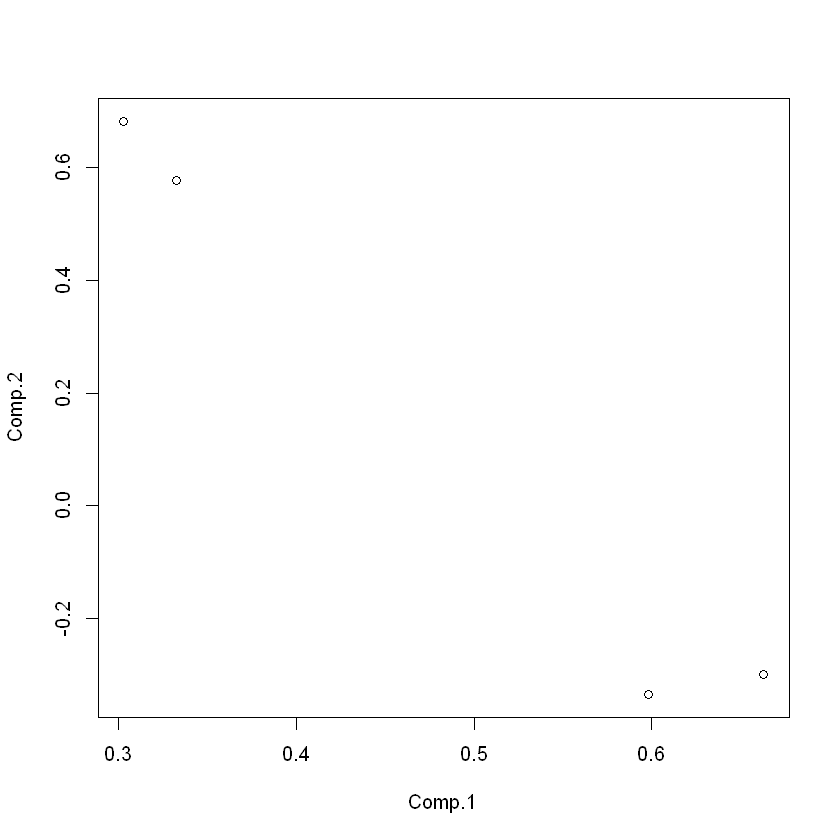

In [138]:
plot(l)

In [109]:
Labels<-c('Temp_1', 'Temp_2', 'Temp_3', 'Temp_4')

In [111]:
unique(Labels)

[1] "Temp_1" "Temp_2" "Temp_3" "Temp_4"

In [113]:
color <- rainbow(length(unique(Labels)))
names(color) <- unique(Labels)

In [130]:
t=Rtsne(data_t,dim=2,perplexity =4)

ERROR: Error in .check_tsne_params(nrow(X), dims = dims, perplexity = perplexity, : perplexity is too large for the number of samples


In [119]:
names

function (x)  .Primitive("names")

In [118]:
color

Temp_1      Temp_2      Temp_3      Temp_4 
"#FF0000FF" "#80FF00FF" "#00FFFFFF" "#8000FFFF"

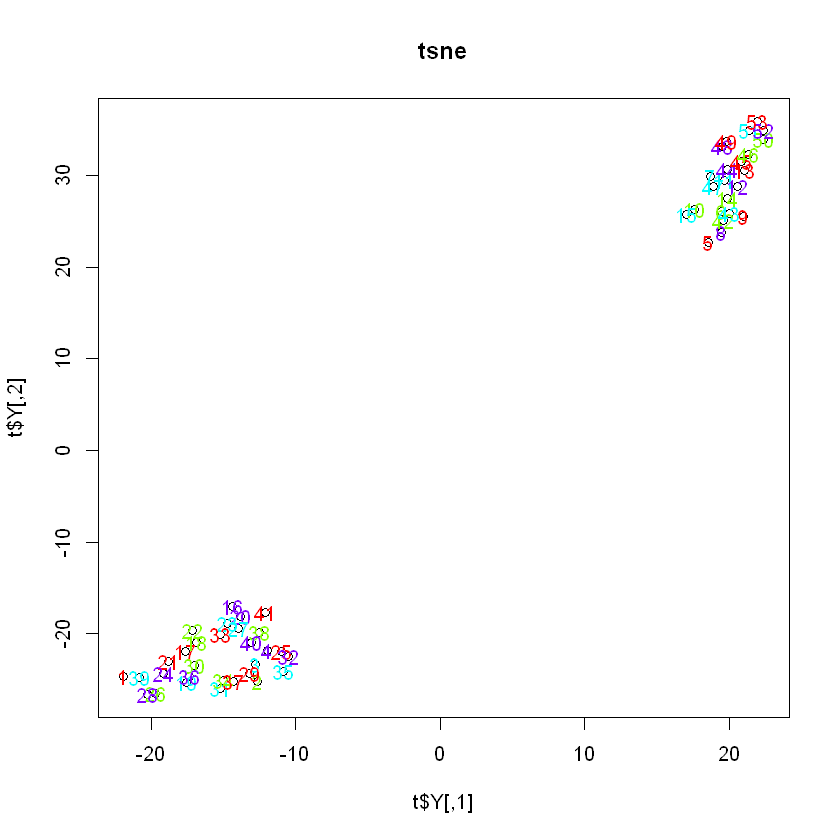

In [124]:
plot(t$Y,main="tsne")
# text(t$Y, labels = Labels, col = color[Labels])
text(t$Y, col = color[Labels])

In [108]:
colnames(data)

[1] "Temp_1" "Temp_2" "Temp_3" "Temp_4"

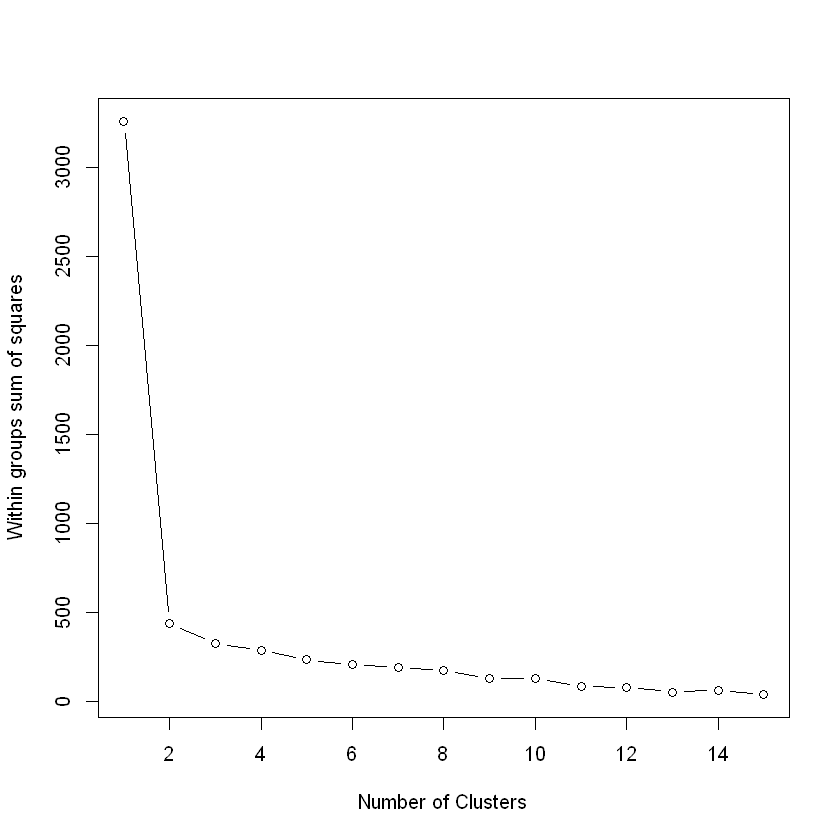

In [19]:

wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:15) wss[i] <- sum(kmeans(data_t,
                                       centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")

In [142]:
?apply

In [17]:
k=kmeans(data_t, 2, iter.max = 10, nstart = 1,
 algorithm = c("Hartigan-Wong", "Lloyd", "Forgy",
 "MacQueen"), trace=FALSE)

In [18]:
k

K-means clustering with 2 clusters of sizes 11, 9

Cluster means:
      [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
1 26.67045 26.97418 26.90318 26.84073 26.86355 26.61936 26.61936 26.81527
2 25.52411 25.99972 25.66639 25.66639 25.64228 25.64228 25.81911 25.79161
      [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
1 26.76686 26.86650 26.65336 26.93750 26.78977 27.45141 27.45705 26.74718
2 25.73967 25.82283 25.99283 25.96511 26.62833 27.22194 26.59000 25.54150
     [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]
1 26.51405 26.83786 26.45727 26.43450 26.43450 26.68723 26.36050 26.46855
2 25.18389 25.73922 24.99272 25.26728 25.37489 25.58000 24.92717 24.92717
     [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]
1 26.50827 26.41195 26.33241 26.49132 26.23005 26.51691 25.90886 26.27568
2 25.32611 25.32611 24.90967 25.61111 24.96522 25.40589 24.90617 25.35050
     [,33]    [,34]    [,35]    [,36]    [,37]

In [135]:
k$centers #Display&nbsp;cluster centers
table(k$cluster)

25.8435,26.5000,26.6870,26.7500,27.4065,27.5310,27.7185,27.250,27.5000,27.844,...,27.7810,27.906,27.9375,27.8435,28.1870,28.2810,28.0935,28.219,28.281,28.5625
24.8440,25.7495,25.7185,25.9065,26.6560,27.3435,27.5000,27.031,27.3125,27.000,...,27.6255,27.781,27.9060,27.5620,27.7185,27.7815,28.1250,28.375,28.375,28.5310



1 2 
2 2 

In [136]:
k

K-means clustering with 2 clusters of sizes 2, 2

Cluster means:
     [,1]    [,2]    [,3]    [,4]    [,5]    [,6]    [,7]   [,8]    [,9]  [,10]
1 25.8435 26.5000 26.6870 26.7500 27.4065 27.5310 27.7185 27.250 27.5000 27.844
2 24.8440 25.7495 25.7185 25.9065 26.6560 27.3435 27.5000 27.031 27.3125 27.000
   [,11]   [,12]  [,13]   [,14]   [,15]  [,16]  [,17]   [,18]  [,19]   [,20]
1 27.937 27.9685 27.906 27.7815 27.9995 27.500 27.094 27.2185 26.656 27.2185
2 27.469 27.3750 27.656 27.3120 26.8435 26.156 25.375 25.4995 25.406 26.0310
    [,21]   [,22]   [,23]   [,24]   [,25]   [,26]  [,27]   [,28]   [,29]  [,30]
1 26.9995 27.3125 27.1875 26.8435 26.8125 27.0310 27.125 26.8745 26.6875 26.906
2 25.1875 25.5000 25.8435 25.1560 25.6875 24.6875 25.875 24.4690 25.7500 25.125
    [,31]   [,32]   [,33]   [,34]   [,35]   [,36]   [,37]  [,38]   [,39]  [,40]
1 26.6875 26.8125 27.1245 26.6875 26.3750 26.8120 26.6875 26.875 26.4685 26.906
2 25.3435 25.6560 25.6875 25.4685 25.6875 25.3745 25.5310 26.031

In [5]:
x=c(2,3,4,4)
y=c(3,4,7,8)

In [7]:
cor(x,y)

[1] 0.9506542

In [8]:
mat <- matrix(runif(5))
mat

0.2655087
0.3721239
0.5728534
0.9082078
0.2016819


In [12]:

mat <- matrix(runif(5))
fn <- function(x, y) 1 - cos(x - y)

proxy::dist(mat, method = fn)

            1           2           3           4
2 0.024084935                                    
3 0.119654797 0.037381593                        
4 0.006914433 0.056442160 0.181425203            
5 0.038874393 0.001789084 0.022908727 0.077933519

In [45]:
install.packages('Rtsne')

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Rtsne' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpiiGSCS\downloaded_packages
